<a href="https://colab.research.google.com/github/codeboy47/airbnb-booking-analysis/blob/main/Akshit_Singh_Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [15]:
#Import package
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# loading csv File
file_path = '/content/drive/MyDrive/Airbnb Bookings Analysis/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path, index_col = False)

In [18]:
# printing shape
print("Shape of the Dataset:", airbnb_df.shape)

Shape of the Dataset: (48895, 16)


In [19]:
# Using head function to get first 5 rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
# using tail with a transpose to get the view of columns
airbnb_df.tail().T

,48890,48891,48892,48893,48894
id,36484665,36485057,36485431,36485609,36487245
name,Charming one bedroom - newly renovated rowhouse,Affordable room in Bushwick/East Williamsburg,Sunny Studio at Historical Neighborhood,43rd St. Time Square-cozy single bed,Trendy duplex in the very heart of Hell's Kitchen
host_id,8232441,6570630,23492952,30985759,68119814
host_name,Sabrina,Marisol,Ilgar & Aysel,Taz,Christophe
neighbourhood_group,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Bedford-Stuyvesant,Bushwick,Harlem,Hell's Kitchen,Hell's Kitchen
latitude,40.67853,40.70184,40.81475,40.75751,40.76404
longitude,-73.94995,-73.93317,-73.94867,-73.99112,-73.98933
room_type,Private room,Private room,Entire home/apt,Shared room,Private room
price,70,40,115,55,90


In [21]:
# To get the descriptive summary of dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [22]:
# studying the missing values of columns
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we see reviews_per_month and calculated_host_listings_count columns have  around ten thousand null values

In [23]:
# Handling the null values
airbnb_df['reviews_per_month'].fillna(0., inplace = True)
airbnb_df.fillna('Not_mapped', inplace = True)

In [24]:
# Now checking if any null values are present in our dataset
count_of_null_values = np.sum(airbnb_df.isnull())
count_of_null_values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [25]:
# setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style='darkgrid')

## What can we learn about different hosts and areas?

## What can we learn from predictions?

### Availability of room types for different neighbourhood groups

In [31]:
# grouping neighbourhood_group according to the mean of availability_365
available_neighbourhood_grps = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index = False).agg({'availability_365': 'mean'}).rename(columns = {'availability_365' : 'availability_of_rooms'})
available_neighbourhood_grps

,neighbourhood_group,room_type,availability_of_rooms
0,Bronx,Entire home/apt,158.000000
1,Bronx,Private room,171.331288
2,Bronx,Shared room,154.216667
3,Brooklyn,Entire home/apt,97.205147
4,Brooklyn,Private room,99.917983
5,Brooklyn,Shared room,178.007264
6,Manhattan,Entire home/apt,117.140996
7,Manhattan,Private room,101.845026
8,Manhattan,Shared room,138.572917
9,Queens,Entire home/apt,132.267176


Text(0, 0.5, 'Availability of Rooms')

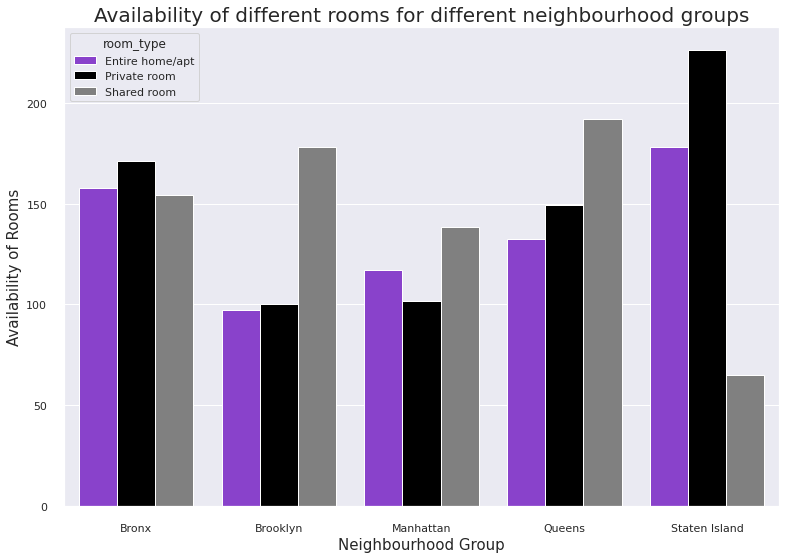

In [32]:
# set seaborn plotting aesthetics for creating grouped bar chart
sns.barplot(
    x = 'neighbourhood_group',
    y = 'availability_of_rooms',
    hue = 'room_type',
    data = available_neighbourhood_grps,
    palette = ['blueviolet', 'black', 'grey']
)
plt.title('Availability of different rooms for different neighbourhood groups', fontsize = 20)
plt.xlabel('Neighbourhood Group', fontsize = 15)
plt.ylabel('Availability of Rooms', fontsize = 15)

Inference:

* The chart clearly states that for Staten Island shared rooms are less available in comparison to other places whereas the availability of private rooms and entire home/apt are quite high.
* For Brooklyn, the availability of rooms is opposite to that of Staten Island. Here shared rooms are in the least demand.
* For Bronx and Manhatten the availability for all room types is roughly the same.


### Coordinates of various rooms in different neighbourhood groups

In [33]:
# finding the total count of listings for each neighbourhood group
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

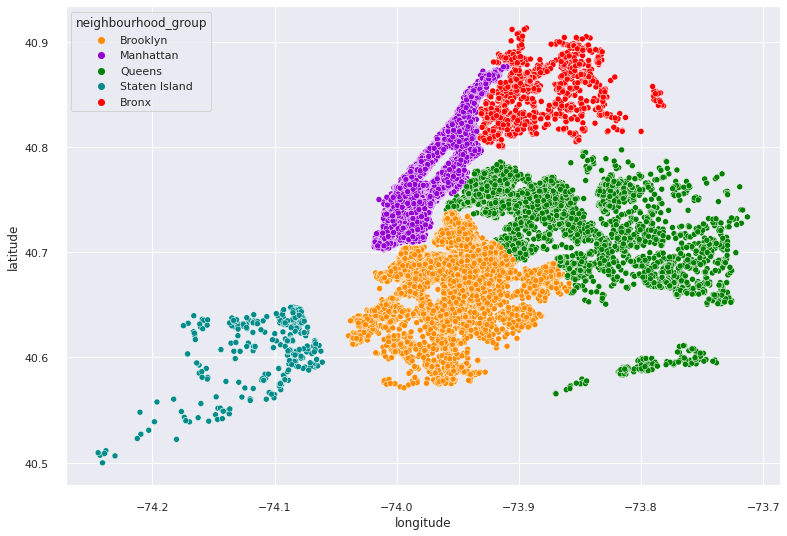

In [34]:
# plotting latitude and longitude of rooms for different neighbourhood groups
sns.scatterplot(
    x = airbnb_df['longitude'], 
    y = airbnb_df['latitude'],
    hue = airbnb_df['neighbourhood_group'],
    palette = ['darkorange', 'darkviolet', 'green', 'darkcyan', 'red']
)

Inference: From the above graph, we observe that Staten Island has the least number of rooms.

## Which hosts are the busiest and why?

## Is there any noticeable difference of traffic among different areas & what could be the reason for it?

### Rooms preferred by different hosts in different neighbourhood groups

In [42]:
# grouping neighbourhood_group according to the host_id
preferred_neighbourhood_grps = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index = False).agg({'host_id': 'count'}).rename(columns = {'host_id' : 'number_of_hosts'})
preferred_neighbourhood_grps

,neighbourhood_group,room_type,number_of_hosts
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


Text(0, 0.5, 'Number of hosts')

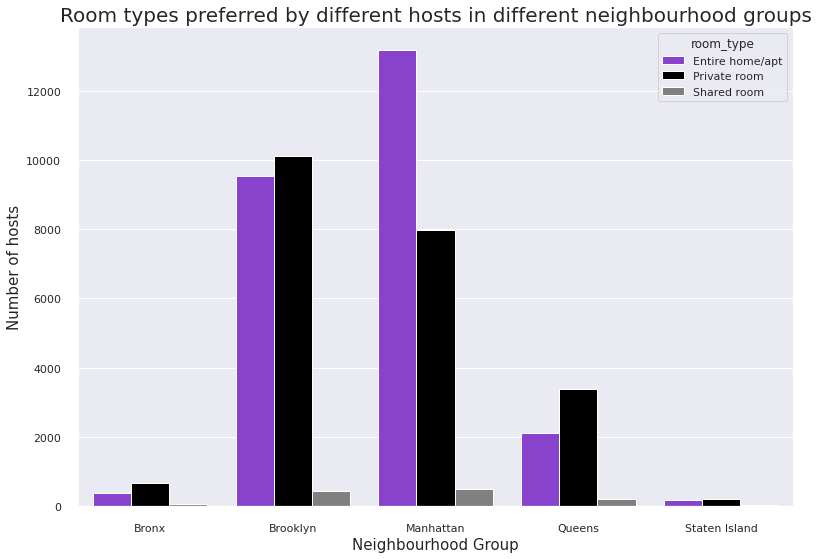

In [43]:
# set seaborn plotting aesthetics for creating grouped bar chart
sns.barplot(
    x = 'neighbourhood_group',
    y = 'number_of_hosts',
    hue = 'room_type',
    data = preferred_neighbourhood_grps,
    palette = ['blueviolet', 'black', 'grey']
)
plt.title('Room types preferred by different hosts in different neighbourhood groups', fontsize = 20)
plt.xlabel('Neighbourhood Group', fontsize = 15)
plt.ylabel('Number of hosts', fontsize = 15)

Inference: <br>


*   As we can see from the above graph entire home/apartment is mostly preferred by people in Manhatten.
*   While in Queens, hosts prefer private rooms whereas, for other boroughs like Bronx, Brooklyn and Staten Island, the overall preference for entire home/apt and private room is the same.
*   Shared rooms are in the least demand for all the boroughs.
